In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
import pickle
from PIL import Image
from sklearn.preprocessing import StandardScaler

In [31]:
# import and label images

data_dir ='L:/!school/!uni/!classes/sem2-2023/software technology/assignments/assignment 2/lung_colon_image_set'
try:os.listdir(data_dir)
except:data_dir ='C:/Users/dylan/OneDrive/school/sem2-2023/software technology/assignments/assignment 2/lung_colon_image_set'

labels_mapping = {
    'colon_aca': 'Colon Adenocarcinoma',
    'colon_n': 'Colon Benign Tissue',
    'lung_aca': 'Lung Adenocarcinoma',
    'lung_n': 'Lung Benign Tissue',
    'lung_scc': 'Lung Squamous Cell Carcinoma'
}

filepaths = []
labels = []

for fold in os.listdir(data_dir):
    foldpath = os.path.join(data_dir, fold)

    for f in os.listdir(foldpath):
        f_path = os.path.join(foldpath, f)

        for file in os.listdir(f_path):
            fpath = os.path.join(f_path, file)
            filepaths.append(fpath)

            labels.append(labels_mapping.get(f, ''))

df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})
data_dir

'L:/!school/!uni/!classes/sem2-2023/software technology/assignments/assignment 2/lung_colon_image_set'

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  25000 non-null  object
 1   labels     25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [18]:
df

,filepaths,labels
0,L:/!school/!uni/!classes/sem2-2023/software te...,Colon Adenocarcinoma
1,L:/!school/!uni/!classes/sem2-2023/software te...,Colon Adenocarcinoma
2,L:/!school/!uni/!classes/sem2-2023/software te...,Colon Adenocarcinoma
3,L:/!school/!uni/!classes/sem2-2023/software te...,Colon Adenocarcinoma
4,L:/!school/!uni/!classes/sem2-2023/software te...,Colon Adenocarcinoma
...,...,...
24995,L:/!school/!uni/!classes/sem2-2023/software te...,Lung Squamous Cell Carcinoma
24996,L:/!school/!uni/!classes/sem2-2023/software te...,Lung Squamous Cell Carcinoma
24997,L:/!school/!uni/!classes/sem2-2023/software te...,Lung Squamous Cell Carcinoma
24998,L:/!school/!uni/!classes/sem2-2023/software te...,Lung Squamous Cell Carcinoma


In [19]:
df['labels'].value_counts()

labels
Colon Adenocarcinoma            5000
Colon Benign Tissue             5000
Lung Adenocarcinoma             5000
Lung Benign Tissue              5000
Lung Squamous Cell Carcinoma    5000
Name: count, dtype: int64

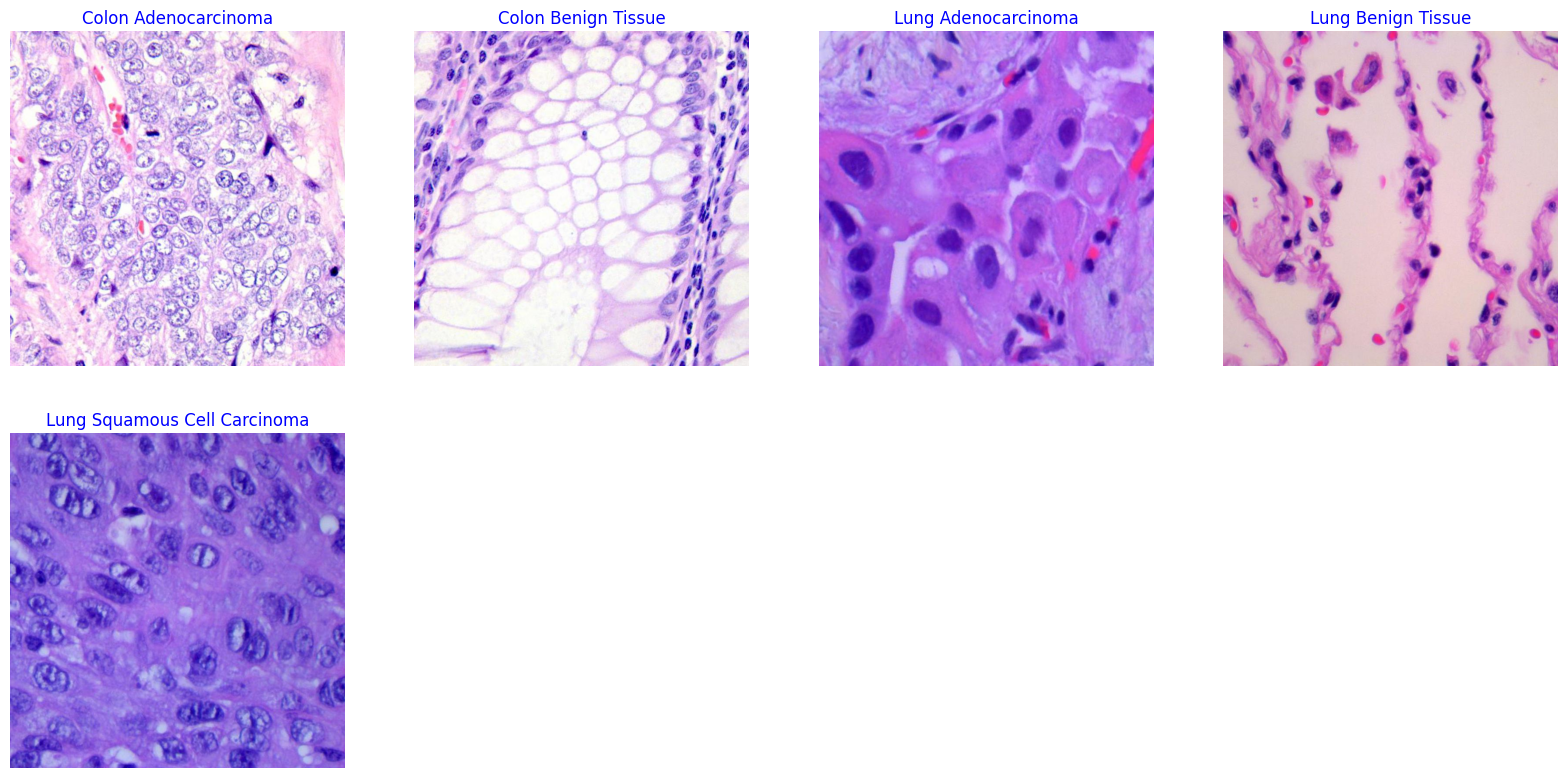

In [29]:
#show image per class

classes = df['labels'].unique()

plt.figure(figsize=(20, 20))

for i, class_name in enumerate(classes):
    img_path = df[df['labels']==class_name]['filepaths'].values[0]
    
    img = cv2.imread(img_path)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(4, 4, i + 1)
    plt.imshow(img_rgb)
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')

plt.show()

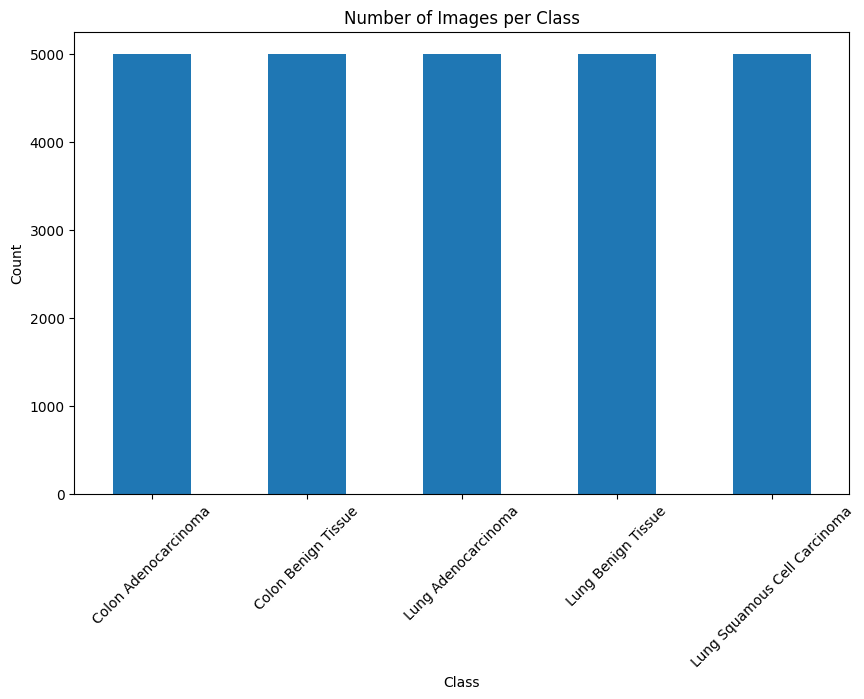

In [20]:
#bar plot

plt.figure(figsize=(10, 6))
df['labels'].value_counts().plot(kind='bar')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [21]:
# #pca

# images = []

# for i in df['filepaths']:
#     img = Image.open(i).convert('L')
#     img = img.resize((128, 128), Image.LANCZOS)
#     img = np.array(img).flatten()
#     images.append(img)
    
    
    
    
# from sklearn.preprocessing import LabelEncoder
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE


# le = LabelEncoder()
# labels_encoded = le.fit_transform(df['labels'])

# pca = PCA(n_components=50)
# pca_result = pca.fit_transform(images)

# tsne = TSNE(n_components=2)
# tsne_result = tsne.fit_transform(pca_result)

In [22]:
# #pca

# try:
#     with open('pca_result.pkl', 'rb') as f:
#         pca_result = pickle.load(f)

#     with open('tsne_result.pkl', 'rb') as f:
#         tsne_result = pickle.load(f)
# except:
#     images = []

#     for i in df['filepaths']:
#         img = Image.open(i).convert('L')
#         img = img.resize((128, 128), Image.LANCZOS)
#         img = np.array(img).flatten()
#         images.append(img)

#     from sklearn.preprocessing import LabelEncoder
#     from sklearn.decomposition import PCA
#     from sklearn.manifold import TSNE

#     le = LabelEncoder()
#     labels_encoded = le.fit_transform(df['labels'])

#     pca = PCA(n_components=50)
#     pca_result = pca.fit_transform(images)

#     tsne = TSNE(n_components=2)
#     tsne_result = tsne.fit_transform(pca_result)

#     # Save result
#     with open('pca_result.pkl', 'wb') as f:
#         pickle.dump(pca_result, f)

#     with open('tsne_result.pkl', 'wb') as f:
#         pickle.dump(tsne_result, f)
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

try:
    with open('pca_result.pkl', 'rb') as f:
        pca_result = pickle.load(f)

    with open('tsne_result.pkl', 'rb') as f:
        tsne_result = pickle.load(f)

    with open('labels_encoded.pkl', 'rb') as f:
        labels_encoded = pickle.load(f)
except:
    images = []
    
    for i in df['filepaths']:
        img = Image.open(i).convert('L')
        img = img.resize((128, 128), Image.LANCZOS)
        img = np.array(img).flatten()
        images.append(img)
    
    le = LabelEncoder()
    labels_encoded = le.fit_transform(df['labels'])
    
    pca = PCA(n_components=50)
    pca_result = pca.fit_transform(images)
    
    tsne = TSNE(n_components=2)
    tsne_result = tsne.fit_transform(pca_result)
    
    # Save result
    with open('pca_result.pkl', 'wb') as f:
        pickle.dump(pca_result, f)

    with open('tsne_result.pkl', 'wb') as f:
        pickle.dump(tsne_result, f)
    
    with open('labels_encoded.pkl', 'wb') as f:
        pickle.dump(labels_encoded, f)

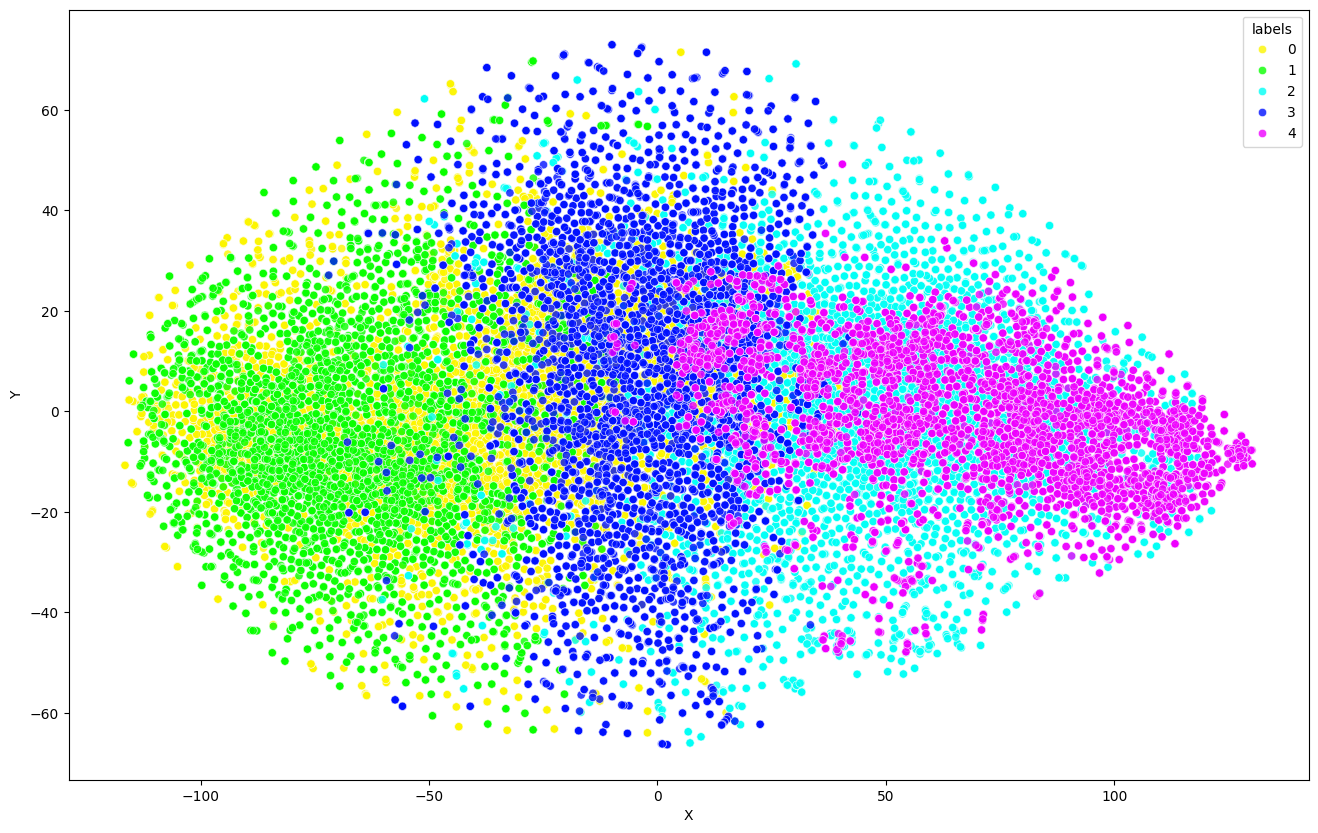

In [23]:
df_tsne = pd.DataFrame({'X':tsne_result[:,0], 'Y':tsne_result[:,1], 'labels':labels_encoded})

plt.figure(figsize=(16,10))
sns.scatterplot(data=df_tsne, x="X", y="Y", hue="labels", palette=sns.color_palette("hsv", 5), legend="full", alpha=0.8)
plt.show()

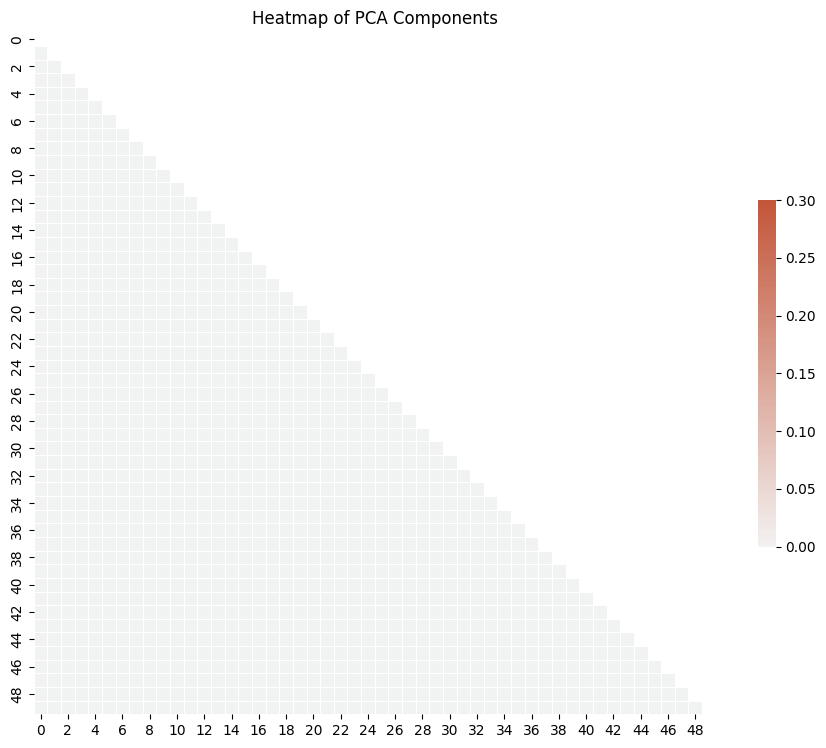

In [24]:
# heatmap

scaler = StandardScaler()
scaled_pca_result = scaler.fit_transform(pca_result)

scaled_pca_df = pd.DataFrame(scaled_pca_result)


correlations = scaled_pca_df.corr()

mask = np.triu(np.ones_like(correlations, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Heatmap of PCA Components')
plt.show()

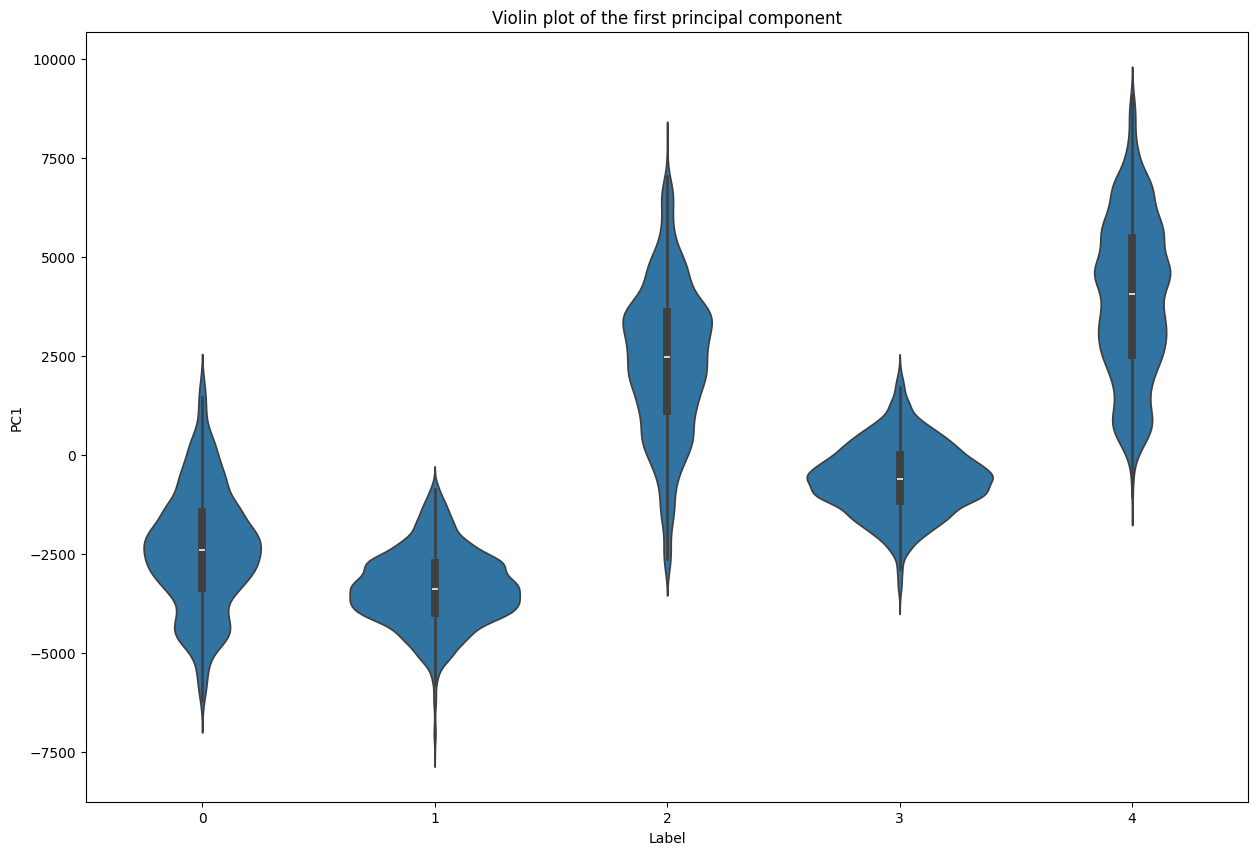

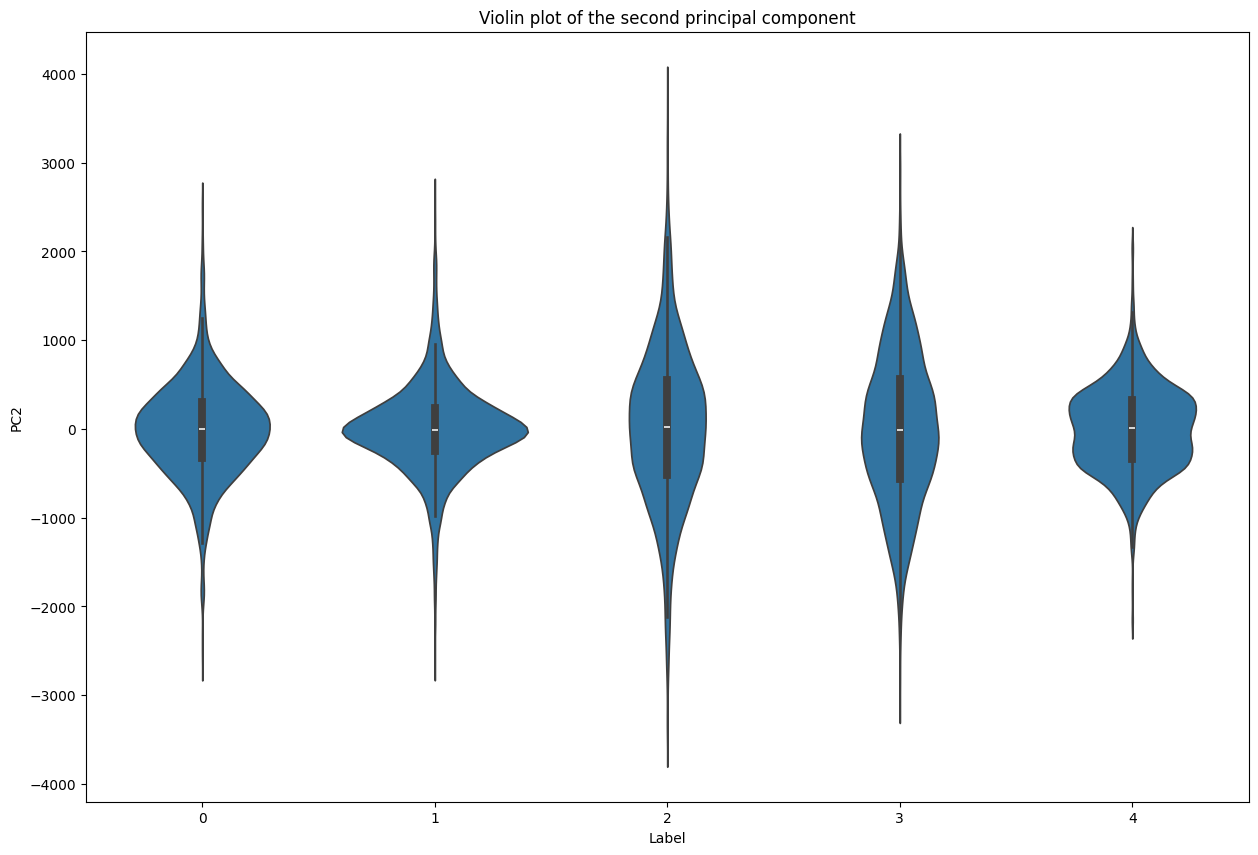

In [25]:
#violin plots

df_plot = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'])
df_plot['Label'] = labels_encoded

plt.figure(figsize=(15, 10))
sns.violinplot(x='Label', y='PC1', data=df_plot)
plt.title('Violin plot of the first principal component')
plt.show()

plt.figure(figsize=(15, 10))
sns.violinplot(x='Label', y='PC2', data=df_plot)
plt.title('Violin plot of the second principal component')
plt.show()

In [26]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define the target and the features. "labels_encoded" are the target, and "pca_result" is the feature.
X = pca_result
y = labels_encoded

# Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Use model to make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

KeyboardInterrupt: 

                              precision    recall  f1-score   support

        Colon Adenocarcinoma       0.88      0.69      0.77      1021
         Colon Benign Tissue       0.82      0.91      0.86      1000
         Lung Adenocarcinoma       0.85      0.84      0.85       985
          Lung Benign Tissue       0.79      0.90      0.84       989
Lung Squamous Cell Carcinoma       0.93      0.92      0.92      1005

                    accuracy                           0.85      5000
                   macro avg       0.85      0.85      0.85      5000
                weighted avg       0.85      0.85      0.85      5000



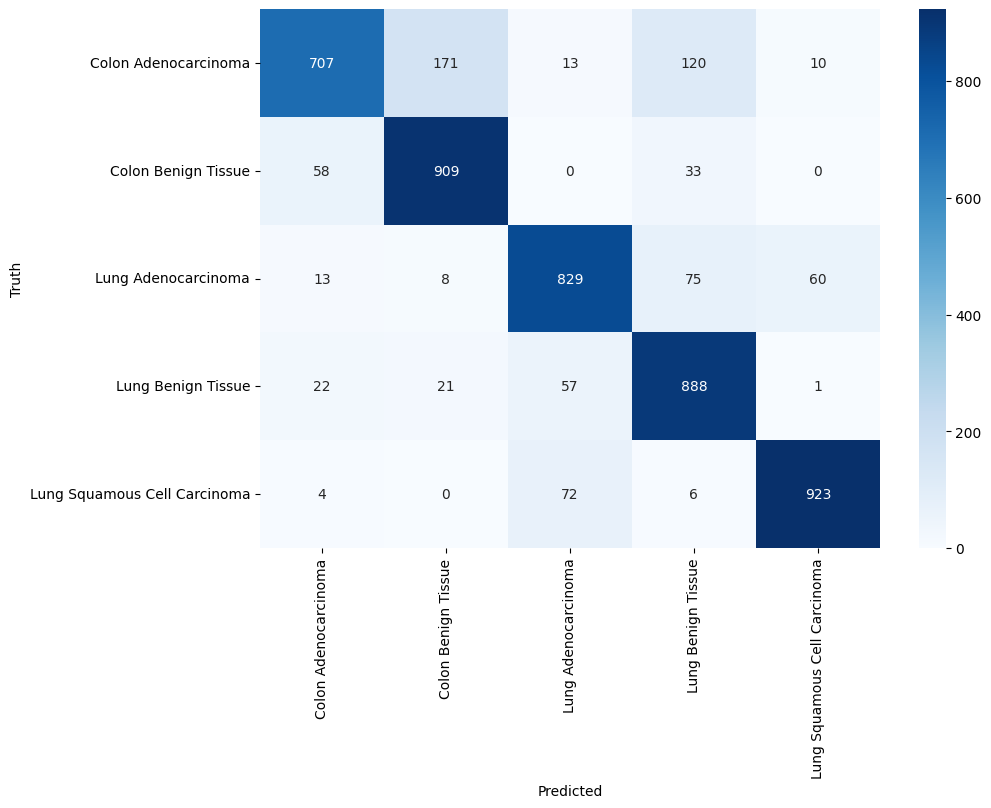

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

#split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(pca_result, labels_encoded, test_size = 0.20, random_state = 42)

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

#Fit the model
rfc.fit(X_train, y_train)

# Predicting the output
predictions = rfc.predict(X_test)

# Print the Classification Report
print(classification_report(y_test, predictions, target_names=le.classes_))

# Plot Confusion Matrix
confusion_mat = confusion_matrix(y_test, predictions)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="Blues",
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()